<a href="https://colab.research.google.com/github/muppallajhansi/Jhansi_INFO5731_Fall2024/blob/main/Muppalla_Jhansi_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline

# Function to read the dataset and store it in a DataFrame
def load_text_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                label, content = parts
                if label.isdigit():
                    data.append((content, int(label)))
    return pd.DataFrame(data, columns=['content', 'label'])

# Load the training and testing datasets
train_data = load_text_data('stsa-train.txt')
test_data = load_text_data('stsa-test.txt')

# Use a subset of the training data for faster processing
sampled_train_data = train_data.sample(n=500, random_state=42)
X_train, y_train = sampled_train_data['content'], sampled_train_data['label']
X_test, y_test = test_data['content'], test_data['label']

# TF-IDF vectorizer to convert text data into numerical form
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limited features for quick results

# Machine learning models to evaluate
classification_models = {
    "NaiveBayes": MultinomialNB(),
    "SupportVectorMachine": SVC(kernel='linear'),
    "KNearestNeighbors": KNeighborsClassifier(n_neighbors=3),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=50),  # Fewer estimators for faster runtime
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
}

# Function to train and test a model, and return its performance metrics
def evaluate_model_performance(model, train_texts, train_labels, test_texts, test_labels):
    model_pipeline = make_pipeline(tfidf_vectorizer, model)
    model_pipeline.fit(train_texts, train_labels)
    predictions = model_pipeline.predict(test_texts)
    accuracy = accuracy_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    return accuracy, recall, precision, f1

# Evaluate all models and store their metrics
model_performance = {}
for model_name, model in classification_models.items():
    accuracy, recall, precision, f1 = evaluate_model_performance(model, X_train, y_train, X_test, y_test)
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }

# Display the evaluation metrics for each model
for model_name, metrics in model_performance.items():
    print(f"{model_name} Performance:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")
    print("\n")


NaiveBayes Performance:
  Accuracy: 0.6721581548599671
  Recall: 0.7370737073707371
  Precision: 0.6517509727626459
  F1 Score: 0.6917914300464636


SupportVectorMachine Performance:
  Accuracy: 0.6803953871499177
  Recall: 0.6798679867986799
  Precision: 0.6798679867986799
  F1 Score: 0.6798679867986799


KNearestNeighbors Performance:
  Accuracy: 0.6029654036243822
  Recall: 0.35533553355335534
  Precision: 0.7021739130434783
  F1 Score: 0.4718772826880935


DecisionTree Performance:
  Accuracy: 0.5952773201537617
  Recall: 0.5434543454345434
  Precision: 0.6053921568627451
  F1 Score: 0.5727536231884058


RandomForest Performance:
  Accuracy: 0.5958264689730917
  Recall: 0.37403740374037403
  Precision: 0.6706114398422091
  F1 Score: 0.480225988700565


XGBoost Performance:
  Accuracy: 0.5875892366831411
  Recall: 0.45544554455445546
  Precision: 0.6179104477611941
  F1 Score: 0.5243825205826472




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


WORD2VEC and BERT RESULTS


In [8]:
from gensim.downloader import load

# Load a smaller pre-trained model available in gensim (e.g., 'glove-wiki-gigaword-50')
word2vec_model = load('glove-wiki-gigaword-50')  # This model is smaller and

In [9]:
import pandas as pd
from gensim.downloader import load
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
import torch
from torch.utils.data import DataLoader, TensorDataset

# Function to read and optionally sample the dataset
def load_and_sample_text_data(file_path, sample_size=None):
    text_data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                label, text = parts
                if label.isdigit():
                    text_data.append((text, int(label)))
    df = pd.DataFrame(text_data, columns=['text', 'label'])
    if sample_size:
        df = df.sample(n=sample_size, random_state=42)
    return df

# Load the training and testing datasets
train_dataset = load_and_sample_text_data('stsa-train.txt', sample_size=500)
test_dataset = load_and_sample_text_data('stsa-test.txt', sample_size=200)
train_texts, train_labels = train_dataset['text'], train_dataset['label']
test_texts, test_labels = test_dataset['text'], test_dataset['label']

### Word2Vec Approach ###

# Load a pre-trained Word2Vec model from gensim
word2vec_model = load('glove-wiki-gigaword-50')

# Function to generate sentence embeddings using Word2Vec
def create_word2vec_sentence_embeddings(sentences, model):
    embeddings = []
    for sentence in sentences:
        words = sentence.split()
        word_vectors = [model[word] for word in words if word in model]
        if word_vectors:
            sentence_embedding = sum(word_vectors) / len(word_vectors)
        else:
            sentence_embedding = [0] * model.vector_size
        embeddings.append(sentence_embedding)
    return embeddings

# Generate Word2Vec embeddings for training and testing
train_embeddings_word2vec = create_word2vec_sentence_embeddings(train_texts, word2vec_model)
test_embeddings_word2vec = create_word2vec_sentence_embeddings(test_texts, word2vec_model)

# Train a logistic regression model on Word2Vec embeddings
word2vec_classifier = LogisticRegression(max_iter=100)
word2vec_classifier.fit(train_embeddings_word2vec, train_labels)
word2vec_predictions = word2vec_classifier.predict(test_embeddings_word2vec)

# Evaluate the Word2Vec model
model_evaluation_results = {
    'Word2Vec': {
        "Accuracy": accuracy_score(test_labels, word2vec_predictions),
        "Recall": recall_score(test_labels, word2vec_predictions),
        "Precision": precision_score(test_labels, word2vec_predictions),
        "F1 Score": f1_score(test_labels, word2vec_predictions)
    }
}

### BERT Approach ###

# Initialize the BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to create BERT embeddings
def create_bert_sentence_embeddings(sentences, tokenizer, model, max_len=128):
    input_ids, attention_masks = [], []

    for sentence in sentences:
        encoded = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Extract [CLS] token embeddings

    return cls_embeddings

# Generate BERT embeddings for training and testing
train_embeddings_bert = create_bert_sentence_embeddings(train_texts, bert_tokenizer, bert_model)
test_embeddings_bert = create_bert_sentence_embeddings(test_texts, bert_tokenizer, bert_model)

# Train a logistic regression model on BERT embeddings
bert_classifier = LogisticRegression(max_iter=100)
bert_classifier.fit(train_embeddings_bert, train_labels)
bert_predictions = bert_classifier.predict(test_embeddings_bert)

# Evaluate the BERT model
model_evaluation_results['BERT'] = {
    "Accuracy": accuracy_score(test_labels, bert_predictions),
    "Recall": recall_score(test_labels, bert_predictions),
    "Precision": precision_score(test_labels, bert_predictions),
    "F1 Score": f1_score(test_labels, bert_predictions)
}

# Display the evaluation results for both Word2Vec and BERT models
for model_name, metrics in model_evaluation_results.items():
    print(f"{model_name} Model Results:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")
    print("\n")


Word2Vec Model Results:
  Accuracy: 0.755
  Recall: 0.7307692307692307
  Precision: 0.7835051546391752
  F1 Score: 0.7562189054726368


BERT Model Results:
  Accuracy: 0.835
  Recall: 0.8365384615384616
  Precision: 0.8446601941747572
  F1 Score: 0.8405797101449275




## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

K-means Silhouette Score (TF-IDF): 0.040512292116274426
DBSCAN Silhouette Score (TF-IDF): 0.18520553362789438
Hierarchical Clustering Silhouette Score (TF-IDF): 0.028340375844807447
Word2Vec K-means Silhouette Score: 0.5120728588780117
BERT K-means Silhouette Score: 0.10397091507911682


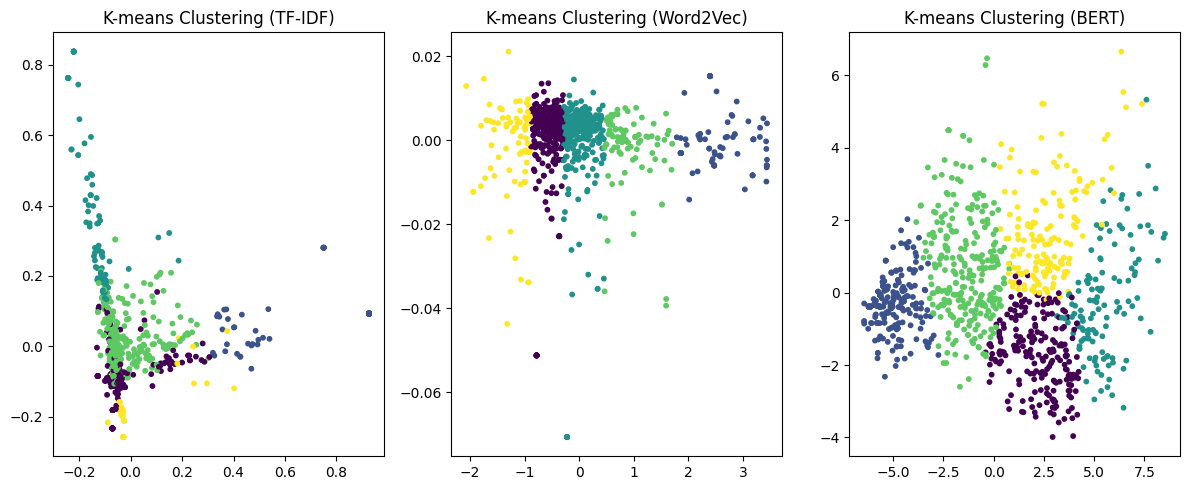

In [10]:
data_chunks = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', usecols=['Reviews'], chunksize=10000, on_bad_lines='skip', engine='python')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Temporary list to store valid data chunks
cleaned_data_chunks = []

# Load and clean data in batches to handle large files
try:
    data_batches = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', usecols=['Reviews'],
                               chunksize=10000, on_bad_lines='skip', engine='python')
    for batch in data_batches:
        cleaned_data_chunks.append(batch.dropna(subset=['Reviews']))
except Exception as load_error:
    print("Error loading file:", load_error)

# Concatenate cleaned chunks into a single DataFrame
reviews_data = pd.concat(cleaned_data_chunks, ignore_index=True)

# Sample a subset for faster processing if necessary
reviews_data = reviews_data.sample(n=1000, random_state=42)

# Preprocess text by lowercasing and removing non-alphabet characters
reviews_data['cleaned_reviews'] = reviews_data['Reviews'].str.lower().str.replace('[^a-zA-Z]', ' ', regex=True)

# Convert text data to numerical representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews_data['cleaned_reviews'])

### K-means Clustering (TF-IDF) ###
kmeans_tfidf = KMeans(n_clusters=5, random_state=42)
tfidf_kmeans_labels = kmeans_tfidf.fit_predict(tfidf_matrix)
tfidf_kmeans_score = silhouette_score(tfidf_matrix, tfidf_kmeans_labels)
print(f"K-means Silhouette Score (TF-IDF): {tfidf_kmeans_score}")

### DBSCAN Clustering (TF-IDF) ###
dbscan_clustering = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan_clustering.fit_predict(tfidf_matrix)
# Compute silhouette score excluding noise points
dbscan_silhouette_score = silhouette_score(tfidf_matrix[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score (TF-IDF): {dbscan_silhouette_score}")

### Hierarchical Clustering (TF-IDF) ###
# Filter rows with all zero values
non_zero_rows = np.where(tfidf_matrix.toarray().sum(axis=1) != 0)[0]
filtered_tfidf_matrix = tfidf_matrix[non_zero_rows]

# Apply hierarchical clustering on the filtered TF-IDF data
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='average')
hierarchical_labels = hierarchical_clustering.fit_predict(filtered_tfidf_matrix.toarray())
hierarchical_score = silhouette_score(filtered_tfidf_matrix, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score (TF-IDF): {hierarchical_score}")

### Word2Vec Embeddings and Clustering ###
# Train Word2Vec model on tokenized reviews
tokenized_reviews = reviews_data['cleaned_reviews'].str.split()
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Generate sentence embeddings by averaging word vectors
def average_word2vec_vectors(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return sum(word_vectors) / len(word_vectors) if word_vectors else [0] * model.vector_size

word2vec_embeddings = [average_word2vec_vectors(review, word2vec_model) for review in reviews_data['cleaned_reviews']]

# K-means Clustering on Word2Vec Embeddings
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
word2vec_labels = kmeans_word2vec.fit_predict(word2vec_embeddings)
word2vec_silhouette_score = silhouette_score(word2vec_embeddings, word2vec_labels)
print(f"Word2Vec K-means Silhouette Score: {word2vec_silhouette_score}")

### BERT Embeddings and Clustering ###
# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to create embeddings using BERT
def generate_bert_embeddings(sentences, tokenizer, model, max_len=128):
    input_ids, attention_masks = [], []

    for sentence in sentences:
        encoded = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Extract CLS token embeddings

bert_embeddings = generate_bert_embeddings(reviews_data['cleaned_reviews'], bert_tokenizer, bert_model)

# K-means Clustering on BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)
bert_silhouette_score = silhouette_score(bert_embeddings, bert_labels)
print(f"BERT K-means Silhouette Score: {bert_silhouette_score}")

### Visualization ###
# Reduce dimensions for visualization
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())
word2vec_2d = pca.fit_transform(word2vec_embeddings)
bert_2d = pca.fit_transform(bert_embeddings)

# Plot clusters for each method
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=tfidf_kmeans_labels, cmap='viridis', s=10)
plt.title("K-means Clustering (TF-IDF)")

plt.subplot(1, 3, 2)
plt.scatter(word2vec_2d[:, 0], word2vec_2d[:, 1], c=word2vec_labels, cmap='viridis', s=10)
plt.title("K-means Clustering (Word2Vec)")

plt.subplot(1, 3, 3)
plt.scatter(bert_2d[:, 0], bert_2d[:, 1], c=bert_labels, cmap='viridis', s=10)
plt.title("K-means Clustering (BERT)")

plt.tight_layout()
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

These methods produce various results in terms of grouping text data. The TF-IDF value in the k- means clustering is low which is 0.041 which indicates thes clusters are not well defined.This may be die to TF-IDF vectors which is a challenging to form clusters and boundaries. DB SCAN have high TF-IDF compared to k means clusterung which is helpful to identify the clusters of different shapes which are noisy. Hierarchical clustering, also on TF-IDF data, had the lowest silhouette score (0.028), suggesting very weak clustering.

K-meanns with Word2Vec embeddings have higher silhouette score which is 0.527 which shows that have lower dimensional embedding with meaningful grouping of data. Clustering with BERT have strong results compared to other. BERT model captuers nuanced context even though it is intensive computationally. finally, Word2Vec embeddings provided the most distinct clusters, followed by DBSCAN, while TF-IDF-based approaches generally struggled to create cohesive groupings in this text dataset.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [11]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This assignment was an insightful experience that enhanced my understanding of machine learning techniques, especially in text clustering. Exploring K-means, DBSCAN, hierarchical clustering, and embeddings like Word2Vec and BERT demonstrated how each method captures semantic meaning differently. These exercises strengthened both my technical and analytical skills, making it a valuable learning process.
'''

'\nThis assignment was an insightful experience that enhanced my understanding of machine learning techniques, especially in text clustering. Exploring K-means, DBSCAN, hierarchical clustering, and embeddings like Word2Vec and BERT demonstrated how each method captures semantic meaning differently. These exercises strengthened both my technical and analytical skills, making it a valuable learning process.\n'